In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.helper import plot, plot2d
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
import math
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_classification, load_digits
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.ensemble.forest import RandomForestClassifier
from scipy.stats import multivariate_normal
import itertools
import scipy

matplotlib.rcParams['figure.figsize'] = [5, 5]
sns.set()
sns.set_style("ticks")

In [2]:
def find_h(X, n_sample=5, n_neigh=5, use_mean=False):
    np.random.seed(1000)
    tree = scipy.spatial.cKDTree(X)
    sample = random.sample(X, k=n_sample)
    _func = lambda point: np.mean([x for x in tree.query(point, k = n_neigh+1)[0] if x > 0])
    if use_mean:
        h = np.mean([_func(x) for x in sample])
    else:
        h = np.max([_func(x) for x in sample])
    return h

In [3]:
np.random.seed(500)
cov = np.array([[0.7,0],[0,0.7]])
one = np.random.multivariate_normal(mean=[0,1.73*1.3], cov=cov, size=1000)
two = np.random.multivariate_normal(mean=[1.3,0], cov=cov, size=1000)
tree = np.random.multivariate_normal(mean=[-1.3,0], cov=cov, size=1000)

N0 = 20
N01 = 5*N0
N02 = N0
N03 = N0
X0 = list(one[:N01]) + list(two[:N02]) + list(tree[:N03])
Y0 = list(np.ones(N01)*0) + list(np.ones(N02)*1) + list(np.ones(N03)*2)
X1 = list(one[N01:]) + list(two[N02:]) + list(tree[N03:])
Y1 = list(np.ones(len(one) - N01)*0) + list(np.ones(len(two) - N02)*1) + list(np.ones(len(tree) - N03)*2)
X = list(X0) + list(X1)
Y = list(Y0) + list(Y1)

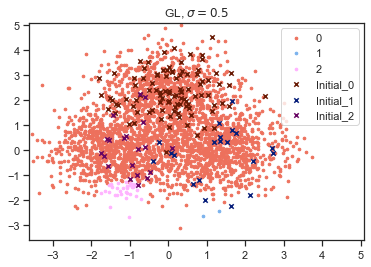

0.21585791311140076


In [4]:
GL = GLMultiClass(X0, Y0, X1, sigma=0.5)#, weight_matrix=weight_matrix)
GL.solve()
plot2d(GL, title="GL, $\sigma=0.5$")
print(f1_score(Y,  GL.Y, average="weighted"))
weight_matrix = GL.weight_matrix

Creating weight matrix cost 0:00:00.000012
0.9762977008769851
0.0056777856635912
0.0009462976105985332
0.8506602533351534


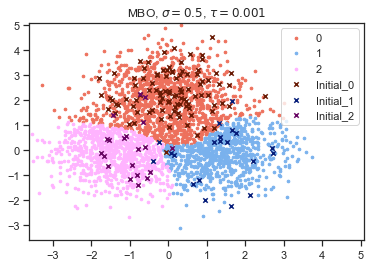

In [5]:
mbo1 = MBOMultiClass(X0, Y0, X1, sigma=0.5, dT=0.001, weight_matrix=weight_matrix)
mbo1.solve()
print(f1_score(Y,  mbo1.Y, average="weighted"))
plot2d(mbo1, title="MBO, $\sigma=0.5$, $\\tau=0.001$")

In [ ]:
mbo1 = MBOMultiClass(X0, Y0, X1, sigma=0.5, dT=0.01, weight_matrix=weight_matrix)
mbo1.solve()
print(f1_score(Y,  mbo1.Y, average="weighted"))
plot2d(mbo1, title="MBO, $\sigma=0.5$, $\\tau=0.01$")

Creating weight matrix cost 0:00:00.000005
0.9759210209487118
0.03295341922695738
0.029561671763506627
0.031512605042016806
0.030581867388362653
0.0373385738349242
0.031231925968768073
0.038126688682077456
0.041914294651235535
0.041028980788016936
0.04384772263766146
0.038108680310515175
0.034256559766763846
0.04573170731707317
0.058918482647296204
0.04424778761061947
0.045835169678272364
0.040348464007336084
0.036104513064133016
0.026829268292682926
0.04538500764915859
0.05203862660944206
0.04075935231714126
0.03826086956521739
0.051188299817184646
0.05939315687540349
0.040295500335795834
0.042717086834733894
0.06646751306945482
0.060174188440221696
0.049003322259136214
0.046046915725456126
0.042572463768115944
0.07707317073170732
0.06993736951983298
0.05739514348785872
0.0330672748004561
0.060459492140266025


In [ ]:
cls = LinearSVC()
cls.fit(X0, Y0)
y_pred = cls.predict(X1)

print(f1_score(Y, list(Y0) + list(y_pred), average="weighted"))

In [ ]:
h = find_h(X, len(X), 1, use_mean=False)/3.6

In [ ]:
GL = GLMultiClass(X0, Y0, X1, sigma=h)#, weight_matrix=weight_matrix)
GL.solve()
plot2d(GL, title="GL, $\sigma=D/3.6$")
print(f1_score(Y,  GL.Y, average="weighted"))
weight_matrix = GL.weight_matrix

In [ ]:
mbo1 = MBOMultiClass(X0, Y0, X1, sigma=h, dT=0.001, weight_matrix=weight_matrix)
mbo1.solve()
print(f1_score(Y,  mbo1.Y, average="weighted"))
plot2d(mbo1, title="MBO, $\sigma=D/3.6$, $\\tau=0.001$")

In [ ]:
mbo1 = MBOMultiClass(X0, Y0, X1, sigma=h, dT=0.01, weight_matrix=weight_matrix)
mbo1.solve()
print(f1_score(Y,  mbo1.Y, average="weighted"))
plot2d(mbo1, title="MBO, $\sigma=D/3.6$, $\\tau=0.01$")

### Archive

In [ ]:
mbo2 = MBOMultiClass(X0, Y0, X1, sigma=h, dT=0.1, weight_matrix=weight_matrix)
mbo2.solve()
plot2d(mbo2)

In [ ]:
mbo3 = MBOMultiClass(X0, Y0, X1, sigma=h, dT=0.001, weight_matrix=weight_matrix)
mbo3.solve()
plot2d(mbo3)

In [ ]:
mbo = MBOMultiClass(X0, Y0, X1, sigma=h, dT=0.005, weight_matrix=weight_matrix)
mbo.solve()
plot(X, np.array(mbo.Y), [])

### 4 Class

In [ ]:
np.random.seed(1000)
cov = np.array([[0.7,0],[0,0.7]])
one = np.random.multivariate_normal(mean=[0,0], cov=cov, size=1000)
two = np.random.multivariate_normal(mean=[-2,-2], cov=cov, size=500)
tree = np.random.multivariate_normal(mean=[0.5,-3], cov=cov, size=500)
four = np.random.multivariate_normal(mean=[3,-1.5], cov=cov, size=500)

N0 = 10
N01 = N0
N02 = N0
N03 = N0
N04 = N0
X0 = list(one[:N01]) + list(two[:N02]) + list(tree[:N03]) + list(four[:N04])
Y0 = list(np.ones(N01)*0) + list(np.ones(N02)*1) + list(np.ones(N03)*2) + list(np.ones(N04)*3)
X1 = list(one[N01:]) + list(two[N02:]) + list(tree[N03:]) + list(four[N04:])
Y1 = list(np.ones(len(one) - N01)*0) + list(np.ones(len(two) - N02)*1) + list(np.ones(len(tree) - N03)*2) + list(np.ones(len(four) - N04)*3)
X = list(X0) + list(X1)
Y = list(Y0) + list(Y1)

#Xr = random.choices(X, k=100)
sigma = find_h(X, len(X), 1, use_mean=False)/3.6
print(sigma)
plot(X, Y, [])

In [ ]:
GL = GLMultiClass(X0, Y0, X1, sigma=sigma)#, weight_matrix=weight_matrix)
GL.solve()
plot2d(GL)
weight_matrix = GL.weight_matrix

In [ ]:
mbo3 = MBOMultiClass(X0, Y0, X1, sigma=sigma, dT=0.001, weight_matrix=weight_matrix)
mbo3.solve()
plot2d(mbo3)

## Different Effect of parameter

### $\sigma$

In [ ]:
GLs2 = GLMultiClass(X0, Y0, X1, cov=0.7*h)#, weight_matrix=weight_matrix)
GLs2.solve()
plot(X, np.array(GLs2.Y), [])

In [ ]:
GLs3 = GLMultiClass(X0, Y0, X1, cov=1.5*h)#, weight_matrix=weight_matrix)
GLs3.solve()
plot(X, np.array(GLs3.Y), [])

In [ ]:
GLs4 = GLMultiClass(X0, Y0, X1, cov=2*h)#, weight_matrix=weight_matrix)
GLs4.solve()
plot(X, np.array(GLs4.Y), [])

In [ ]:
mbos1 = MBOMultiClass(X0, Y0, X1, cov=0.7*h, dT=0.001, weight_matrix=GLs2.weight_matrix)
mbos1.solve()
plot(X, np.array(mbos1.Y), [])

In [ ]:
mbos2 = MBOMultiClass(X0, Y0, X1, cov=1.5*h, dT=0.001, weight_matrix=GLs3.weight_matrix)
mbos2.solve()
plot(X, np.array(mbos2.Y), [])

In [ ]:
mbos3 = MBOMultiClass(X0, Y0, X1, cov=2*h, dT=0.001, weight_matrix=GLs4.weight_matrix)
mbos3.solve()
plot(X, np.array(mbos3.Y), [])

In [ ]:
mbox1 = MBOMultiClass(X0, Y0, X1, cov=0.7*h, dT=0.01, weight_matrix=GLs2.weight_matrix)
mbox1.solve()
plot(X, np.array(mbox1.Y), [])

In [ ]:
mbox2 = MBOMultiClass(X0, Y0, X1, cov=1.5*h, dT=0.01, weight_matrix=GLs3.weight_matrix)
mbox2.solve()
plot(X, np.array(mbox2.Y), [])

In [ ]:
mbox3 = MBOMultiClass(X0, Y0, X1, cov=2*h, dT=0.01, weight_matrix=GLs4.weight_matrix)
mbox3.solve()
plot(X, np.array(mbox3.Y), [])

In [ ]:
np.array(Y0)

In [ ]:
mbo3.Y[:120]

In [ ]:
transform = lambda data: [[1 if i==y else 0 for i in range(3)] for y in data]
# y_true = transform(Y)
# y_pred = transform(mbo3.Y)
f1_score(Y, mbo3.Y, average="weighted")

In [ ]:
datas = [
    {"sigma":0.7, "MBO tau=0.001":f1_score(Y, mbos1.Y, average="weighted"), 
     "MBO tau=0.01":f1_score(Y, mbox1.Y, average="weighted"), "GL":f1_score(Y, GLs2.Y, average="weighted")},
    {"sigma":1, "MBO tau=0.001":f1_score(Y, mbo3.Y, average="weighted"), 
     "MBO tau=0.01":f1_score(Y, mbo2.Y, average="weighted"), "GL":f1_score(Y, GL.Y, average="weighted")},
    {"sigma":1.5, "MBO tau=0.001":f1_score(Y, mbos2.Y, average="weighted"), 
     "MBO tau=0.01":f1_score(Y, mbox2.Y, average="weighted"), "GL":f1_score(Y, GLs3.Y, average="weighted")},
    {"sigma":2, "MBO tau=0.001":f1_score(Y, mbos3.Y, average="weighted"), 
     "MBO tau=0.01":f1_score(Y, mbox3.Y, average="weighted"), "GL":f1_score(Y, GLs4.Y, average="weighted")}
]

pd.DataFrame(datas)

## MNIST

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.helper import plot
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
import math
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_classification, load_digits
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble.forest import RandomForestClassifier
from scipy.stats import multivariate_normal
from datetime import datetime

sns.set()

In [ ]:
N = 300

digits = load_digits()
X = [x.flatten()/digits.images.max() for x in digits.images]
Y = digits.target
n_classes = max(Y)+1

def generate_sd_vector(X, n_neigh=50):
    feature_index = list(range(len(X[0])))
    sd_vect = list()
    for feature_n in feature_index:
        xn = [x[feature_n] for x in X]
        xn.sort()
        nn_ = int(n_neigh / 2)
        max_n = len(xn) - 1
        xn = [max(abs(x-xn[(max(0,i-nn_))]), abs(x-xn[(min(max_n, i+nn_))])) for i, x in enumerate(xn)]
        sigm = np.mean(xn)
        sd_vect.append(sigm)
    return np.array(sd_vect)

sd_vect = generate_sd_vector(X)

X0 = list(X[:N])
Y0 = list(Y[:N])
X1 = list(X[N:])

In [ ]:
## Develop Feature Important
label = 0
feature_amd = list()
feature_index = list(range(len(X0[0])))
for feature_n in feature_index:
    xn = [x[feature_n] for x in X0]
    label_set = np.mean(np.array(xn)[[y==label for y in Y0]])
    avg_mean_distance = list()
    for l in set(Y0):
        if l == label:
            pass
        else:
            distance = np.abs(np.mean(label_set) - np.mean(np.array(xn)[[y==l for y in Y0]]))
            avg_mean_distance.append(distance)
    avg_mean_distance = np.mean(avg_mean_distance)
    feature_amd.append(avg_mean_distance)
    # print("avg mean distance for feature", feature_n, ":", avg_mean_distance)
normalized_amd = feature_amd / max(feature_amd)
normalized_amd = np.array([x if x > 0.01 else 0.01 for x in normalized_amd])
normalized_amd

In [ ]:
#Unbalanced
Z = 1
print("Z : ",Z)
X0 = []
Y0 = []
for c in set(Y):
    if c<5:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
        Y0 += [y for y in Y if y==c][:Z]
    else:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
        Y0 += [y for y in Y if y==c][:Z*2]
X1 = [x for x in X if (list(x) not in list(X0))]
Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print(pd.Series(Y0).value_counts())

# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve()

y_true =  [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
y_pred = [GL.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
#Unbalanced
Z = 1
print("Z : ",Z)
X0 = []
Y0 = []
for c in set(Y):
    if c<5:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
        Y0 += [y for y in Y if y==c][:Z]
    else:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
        Y0 += [y for y in Y if y==c][:Z*2]
X1 = [x for x in X if (list(x) not in list(X0))]
Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print(pd.Series(Y0).value_counts())

# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve(feature_important=True)

y_true =  [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
y_pred = [GL.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
Z = 1
print("Z : ",Z)
X0 = []
Y0 = []
for c in set(Y):
    if c<5:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
        Y0 += [y for y in Y if y==c][:Z]
    else:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
        Y0 += [y for y in Y if y==c][:Z*2]
X1 = [x for x in X if (list(x) not in list(X0))]
Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print(pd.Series(Y0).value_counts())

tic = datetime.now()
Dim = np.array(X).shape[1]
MBO = MBOMultiClass(X0, Y0, X1, cov=0.3, dT=0.05)
MBO.solve()

y_true =  [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
y_pred = [MBO.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))
print("TOTAL RUNNING TIME : ", datetime.now() - tic)

In [ ]:
# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve()

y_true = Y[N:]
y_pred = GL.Y[N:]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve()

y_true = Y[N:]
y_pred = GL.Y[N:]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
Dim = np.array(X).shape[1]
GL = GLMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)))
GL.solve()

In [ ]:
y_true = Y[N:]
y_pred = GL.Y[N:]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
Dim = np.array(X).shape[1]
MBO = MBOMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)), dT=0.001)
MBO.solve()

In [ ]:
Y1_mbo = [MBO.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
accuracy_score(Y1, Y1_mbo)

In [ ]:
Ns = [20,30,40,50,70,90,100,150,200,300]#[10,20]#30,40,50,70,90,100,150,200,300]
# R = list()
RR = list()
for N in Ns:
    print("N", N)
    digits = load_digits()
    X = [x.flatten()/digits.images.max() for x in digits.images]
    Y = digits.target
    n_classes = max(Y)+1
    X0 = list(X[:N])
    Y0 = list(Y[:N])
    X1 = list(X[N:])
    
    Dim = np.array(X).shape[1]
    GL = GLMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)))
    GL.solve()
    
    Dim = np.array(X).shape[1]
    MBO = MBOMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)), dT=0.01)
    MBO.solve()
    
    cls = LinearSVC()
    cls.fit(X0, Y0)
    Y1 = cls.predict(X1)

    
#    R.append({"GL":accuracy_score(Y[N:], GL.Y[N:]), "MBO":accuracy_score(Y[N:], MBO.Y[N:]), "SVM":accuracy_score(Y[N:], Y1)})

    cls = RandomForestClassifier()
    cls.fit(X0, Y0)
    Y1 = cls.predict(X1)
    RR.append(accuracy_score(Y[N:], Y1))

In [ ]:
n_classes = max(Y)+1
Zs = [1,2,3,4,5,7,10,20]
R = list()
for Z in Zs:
    print("Z : ",Z)
    X0 = []
    Y0 = []
    for c in set(Y):
        if c<5:
            X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
            Y0 += [y for y in Y if y==c][:Z]
        else:
            X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
            Y0 += [y for y in Y if y==c][:Z*2]
    X1 = [x for x in X if (list(x) not in list(X0))]
    Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
    print(pd.Series(Y0).value_counts())

    Dim = np.array(X).shape[1]
    GL = GLMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)))
    GL.solve()
    Y1_gl = [GL.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
    
    Dim = np.array(X).shape[1]
    MBO = MBOMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)), dT=0.05)
    MBO.solve()
    Y1_mbo = [MBO.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
    
    cls = LinearSVC()
    cls.fit(X0, Y0)
    Y1_svm = cls.predict(X1)
    
    cls = RandomForestClassifier()
    cls.fit(X0, Y0)
    Y1_rf = cls.predict(X1)
    
    R.append({"N":len(X0), "GL":accuracy_score(Y1, Y1_gl), "MBO":accuracy_score(Y1, Y1_mbo)
              , "SVM":accuracy_score(Y1, Y1_svm), "RandomForest":accuracy_score(Y1, Y1_rf)})
    print({"N":len(X0), "GL":accuracy_score(Y1, Y1_gl), "MBO":accuracy_score(Y1, Y1_mbo)
              , "SVM":accuracy_score(Y1, Y1_svm), "RandomForest":accuracy_score(Y1, Y1_rf)})

In [ ]:
cls = LinearSVC()
cls.fit(X0, Y0)
Y1 = cls.predict(X1)

In [ ]:
y_true = Y[N:]
y_pred = np.array(Y1)
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
df = pd.DataFrame(R)

In [ ]:
df.to_csv("GL_MBO_SVM_RandomForest_MNIST_unbalanced_2N.csv")

In [ ]:
Y[-100:]

In [ ]:
df_plot = df.melt(id_vars="N", value_name="Accuracy", value_vars=["GL", "MBO", "SVM","RandomForest"])
sns.lineplot(data=df_plot, x="N", y="Accuracy", hue="variable")

In [ ]:
pd.Series(Y0).value_counts()

In [ ]:
cat = ["A", "A", "A", "B", "B"]
num = [1,2,3,1,2]
val = [100, 200, 200, 100, 120]
df = pd.DataFrame()
df.loc[:, "date"] = num
df.loc[:, "cat"] = cat・・・、、、、　
df.loc[:, "val"] = val
df

In [ ]:
df_dt = df[["date"]].drop_duplicates()
df_dt["dum"] = 1　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　v
df_cat = df[["cat"]].drop_duplicates()
df_cat["dum"] = 1
df_all = pd.merge(df_dt, df_cat, on="dum", how="outer")[["date", "cat"]]
df_final = pd.merge(df, df_all, on=["date", "cat"], how="outer")

In [ ]:
dcdf_final = pd.merge(df, df_all, on=["date", "cat"], how="outer")
df_final

In [ ]:
feature_col = ["val"]
for c in feature_col:
    df_final["temp"] = df_final.groupby("cat")[c].transform(lambda x: x.rolling(10, 1).mean())
    df_final.loc[:, c] = df_final.apply(lambda s: s[c] if str(s[c])!="nan" else s["temp"], axis=1)
df_final.drop(["temp"], axis=1, inplace=True)
    
df_final

In [ ]:
data = [10,11,10,9,33,10,12,9,9,9,20,13]
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
out = [x for x in data if x > upper_limit or x < lower_limit]
out

In [ ]:
q1